Epoch 1/5
1563/1563 [==============================] - 560s 354ms/step - loss: 0.8601 - accuracy: 0.7089 - val_loss: 0.8752 - val_accuracy: 0.7069
Epoch 2/5
1563/1563 [==============================] - 551s 353ms/step - loss: 0.5181 - accuracy: 0.8255 - val_loss: 0.6494 - val_accuracy: 0.7919
Epoch 3/5
1563/1563 [==============================] - 551s 352ms/step - loss: 0.3917 - accuracy: 0.8663 - val_loss: 1.0023 - val_accuracy: 0.7331
Epoch 4/5
1563/1563 [==============================] - 550s 352ms/step - loss: 0.3136 - accuracy: 0.8929 - val_loss: 0.5083 - val_accuracy: 0.8274
Epoch 5/5
1563/1563 [==============================] - 563s 360ms/step - loss: 0.2378 - accuracy: 0.9168 - val_loss: 0.4803 - val_accuracy: 0.8459


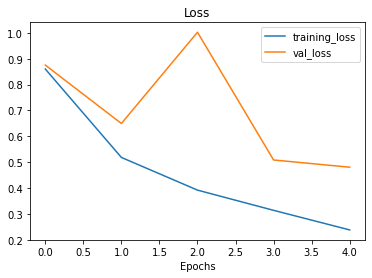

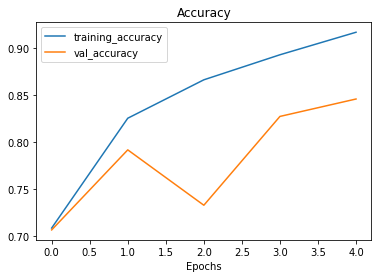

In [2]:
import os, re, time, json
from tensorflow import keras
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models, Input 
from tensorflow import image
from tensorflow.keras.applications.resnet50 import ResNet50
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
import tensorflow_datasets as tfds
BATCH_SIZE = 32 
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#loading lib
cifar = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()

def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
  return output_ims
train_X = preprocess_image_input(X_train)
valid_X = preprocess_image_input(X_test)
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

IMAGE_SHAPE = (224, 224)
  # Download the pretrained model and save it as a Keras layer
pre_trained_model = ResNet50(
    include_top=False ,
    weights='imagenet',
    input_shape=(224,224,3)
)
  

input= Input(shape = (32,32,3))
x=keras.layers.UpSampling2D(size=(7,7))(input)
x=pre_trained_model(x)
x=keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512 , activation = 'relu')(x)
x = keras.layers.BatchNormalization()(x)
output=keras.layers.Dense(10, activation='softmax')(x) # create our own output layer      
model=keras.Model(inputs=input, outputs=output)


# Compile
model.compile(loss='sparse_categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
my_cifar = model.fit(train_X, y_train,
                                  epochs=5,
                                  validation_data=(valid_X,y_test))

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(my_cifar)
